## TP4 - Statistiques sous `Python`

#### Analyse de Données Massives - Master 1ère année

Nous allons utiliser dans ce TP le module `pandas` permettant l'analyse de données avec Python. La première instruction est d'installer le module, à faire dans un terminale de commande. Nous devons aussi installer les modules `matplotlib` et `scipy`.

```{bash}
pip3 install pandas
pip3 install matplotlib
pip3 install scipy
pip3 install numpy
```

Une fois ces modules installée, nous pouvons lancer un `notebook` pour commencer notre programme.

Il faut tout d'abord importer ces modules. La dernière ligne permettra de voir le résultat des graphiques dans le document.

In [160]:
import matplotlib.pyplot
import pandas
import scipy.stats
import numpy

%matplotlib inline

## Données

Nous allons travailler sur les données [tips](donnees/tips.csv). Vous pouvez trouver des informations ([ici](https://www.rdocumentation.org/packages/reshape2/versions/1.4.2/topics/tips)). Voici comment lire ces données dans `python` avec `read_csv()` de `pandas`.

In [161]:
# Lecture d'un fichier texte
tips = pandas.read_csv("donnees/tips.csv", 
                       header = 0, sep = ",")

Sur ces données, il est bien évidemment possible de voir quelques informations classiques.

In [162]:
type(tips)

pandas.core.frame.DataFrame

In [163]:
# informations diverses
tips.shape

(244, 7)

In [164]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [165]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [166]:
list(tips.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [167]:
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

## Statistiques descriptives univariés

La fonction `describe()` permet de décrire toutes les variables quantitatives d'un jeu de données directement.

In [168]:
# résumé basique
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [169]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


### Quantitative

Il est possible de sélectionner les variables soit via les crochets `[]`, soit par un point `.`.

Les fonctions ci-dessous permettent de décrire une variable quantitative (ici `"total_bill"`).

In [170]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [171]:
tips["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [172]:
tips.total_bill.mean()

19.78594262295082

In [173]:
tips.total_bill.std()

8.9024119548568557

In [174]:
tips.total_bill.var()

79.252938613978273

In [175]:
tips.total_bill.min()

3.0699999999999998

In [176]:
tips.total_bill.max()

50.810000000000002

In [177]:
tips.total_bill.median()

17.795

In [178]:
tips.total_bill.quantile([.01, .1, .9, .99])

0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: total_bill, dtype: float64

In [179]:
scipy.stats.normaltest(tips.total_bill)

NormaltestResult(statistic=45.117819123473318, pvalue=1.5951078766352608e-10)

In [180]:
scipy.stats.shapiro(tips.total_bill)

(0.9197188019752502, 3.3245434183371003e-10)

#### Histogramme


Pour représenter graphiquement cette variable, `pandas` met à disposition (via le module `matplotlib` utilisé par `pandas`) des fonctions graphiques.

Pour réaliser un **histogramme**, nous utilisons la fonction `hist()`. Celle-ci peut prendre des options. La fonction `plot()` avec le paramètre `kind` avec la valeur `"hist"` revient au même résultat.

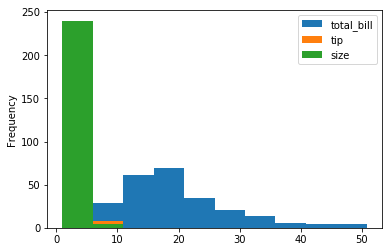

In [181]:
tips.plot.hist()

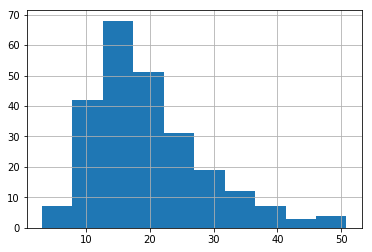

In [182]:
tips.total_bill.hist()

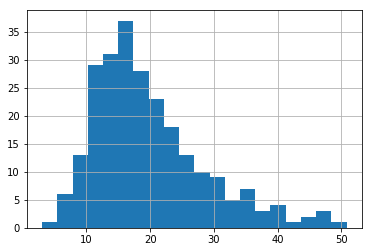

In [183]:
tips.total_bill.hist(bins = 20)

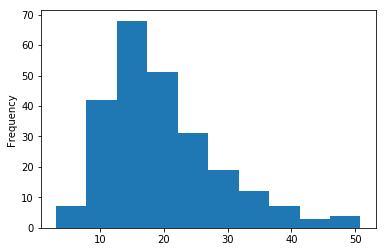

In [184]:
tips.total_bill.plot(kind = "hist")

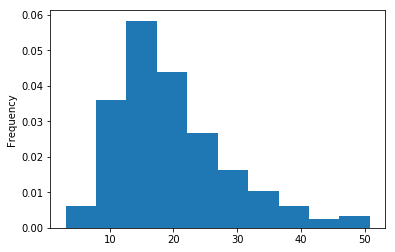

In [185]:
tips.total_bill.plot(kind = "hist", normed = True)

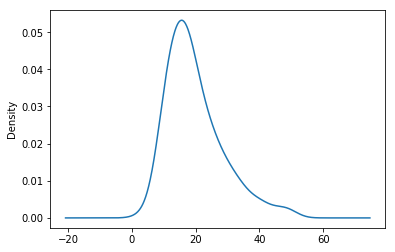

In [186]:
tips.total_bill.plot(kind = "kde")

Pour avoir la densité et l'histogramme sur le même graphique, il est nécessaire de compiler les deux lignes suivantes **ensemble**.

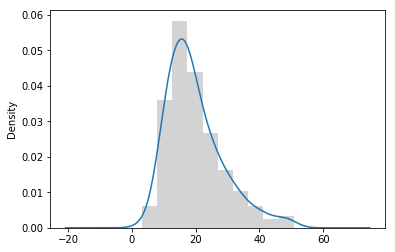

In [187]:
tips.total_bill.plot(kind = "hist", normed = True, color = "lightgrey")
tips.total_bill.plot(kind = "kde")

#### Boîtes à moustaches

Enfin, pour les **boîtes à moustaches**, il faut passer par le `DataFrame` pour l'afficher, et choisir une variable spécifiquement éventuellement.

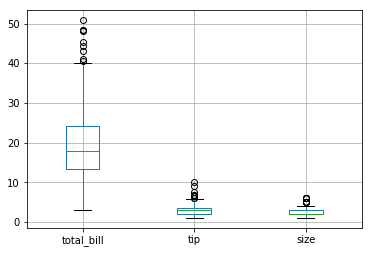

In [188]:
tips.boxplot()

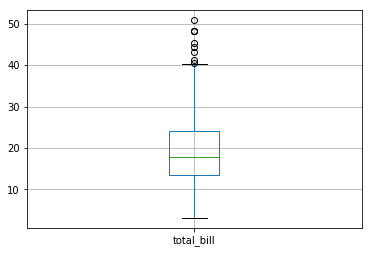

In [189]:
tips.boxplot(column = "total_bill")

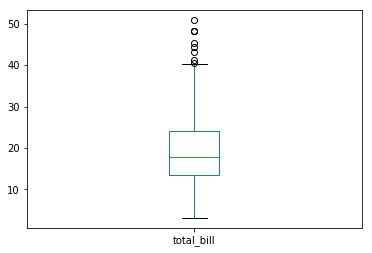

In [190]:
tips.boxplot(column = "total_bill", grid = False)

### Qualitative

Pour les variables qualitatives, il y a plusieurs façons de faire pour obtenir la table d'occurences (ou des effectifs), ainsi que la table des proportions des modalités.

In [191]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [192]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [193]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [194]:
pandas.crosstab(tips.sex, "freq")

col_0,freq
sex,
Female,87
Male,157


In [195]:
pandas.crosstab(tips.sex, "freq", normalize=True)

col_0,freq
sex,
Female,0.356557
Male,0.643443


In [196]:
scipy.stats.chisquare(t)

Power_divergenceResult(statistic=array([ 20.08196721]), pvalue=array([  7.41929371e-06]))

#### Diagramme en barres

Ensuite, pour réaliser un **diagramme en barres**, nous utilisons le type `"bar"` pour `plot()`. Les calculs de proportions précédents nous permettent d'afficher une représentation des proportions plutôt que des effectifs.

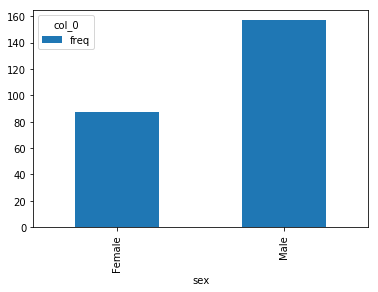

In [197]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.bar()

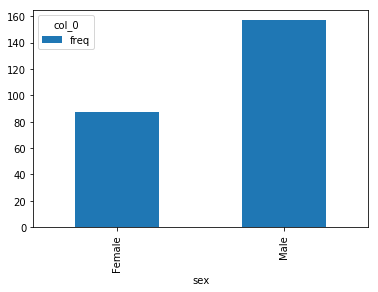

In [198]:
t.plot(kind = "bar")

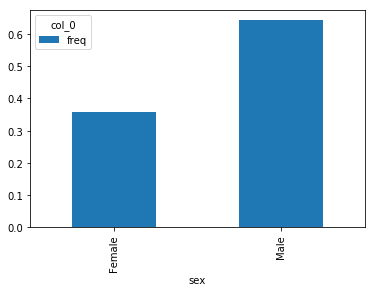

In [199]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t.plot(kind = "bar")

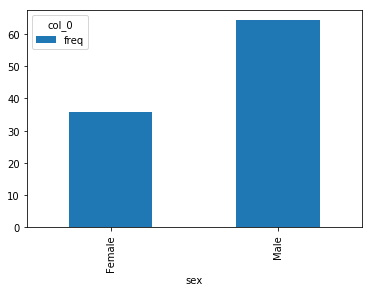

In [200]:
(t * 100).plot(kind = "bar")

#### Diagramme circulaire

Et pour un **diagramme circulaire**, seul le tableau des effectifs produit par `value_counts()` nous permet de le réaliser.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10efc3470>], dtype=object)

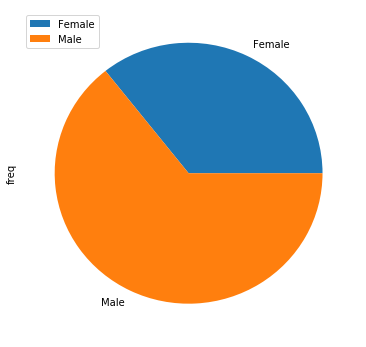

In [201]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))

## Statistiques descriptives bivariées

### Quantitative - quantitative

In [202]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [203]:
tips.total_bill.corr(tips.tip)

0.67573410921136445

In [204]:
tips.total_bill.cov(tips.tip)

8.3235016292248538

In [205]:
scipy.stats.pearsonr(tips.total_bill, tips.tip)

(0.67573410921136434, 6.6924706468640407e-34)

In [206]:
scipy.stats.kendalltau(tips.total_bill, tips.tip)

KendalltauResult(correlation=0.51718097214238101, pvalue=2.4455728480214792e-32)

#### Nuage de points

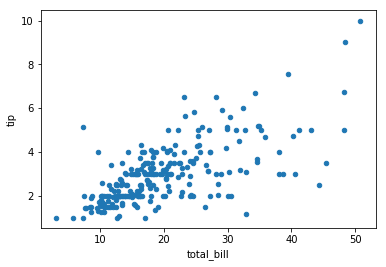

In [207]:
tips.plot.scatter("total_bill", "tip")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f23c358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f6ce128>]], dtype=object)

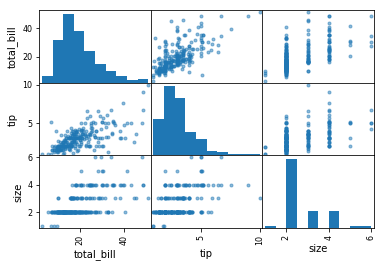

In [208]:
pandas.scatter_matrix(tips)

### Qualitative - qualitative

In [209]:
pandas.crosstab(tips.sex, tips.smoker)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [210]:
pandas.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [211]:
pandas.crosstab(tips.sex, tips.smoker, normalize = True)

smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [212]:
pandas.crosstab(tips.sex, tips.smoker, normalize = "index")

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [213]:
pandas.crosstab(tips.sex, tips.smoker, normalize = "index", margins=True)

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166
All,0.618852,0.381148


In [214]:
pandas.crosstab(tips.sex, tips.smoker, normalize = "columns")

smoker,No,Yes
sex,,
Female,0.357616,0.354839
Male,0.642384,0.645161


In [215]:
pandas.crosstab(tips.sex, tips.smoker, normalize = "columns", margins=True)

smoker,No,Yes,All
sex,,,
Female,0.357616,0.354839,0.356557
Male,0.642384,0.645161,0.643443


In [216]:
t = pandas.crosstab(tips.sex, tips.smoker)
scipy.stats.chi2_contingency(t)

(0.0087632905317735939,
 0.92541702049442298,
 1,
 array([[ 53.84016393,  33.15983607],
        [ 97.15983607,  59.84016393]]))

#### Diagramme en barres

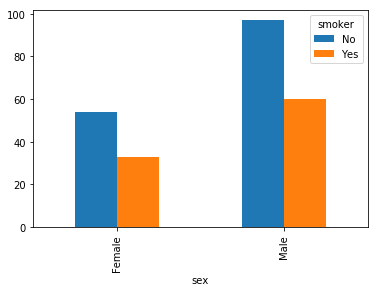

In [217]:
t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.bar()

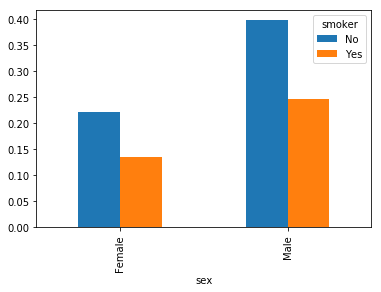

In [218]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize=True)
t.plot.bar()

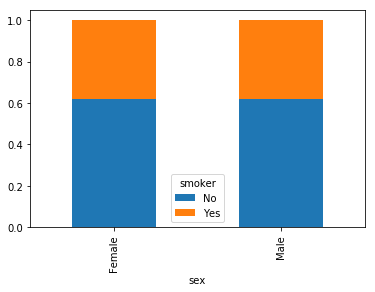

In [219]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize="index")
t.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10faf84a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fc82d68>], dtype=object)

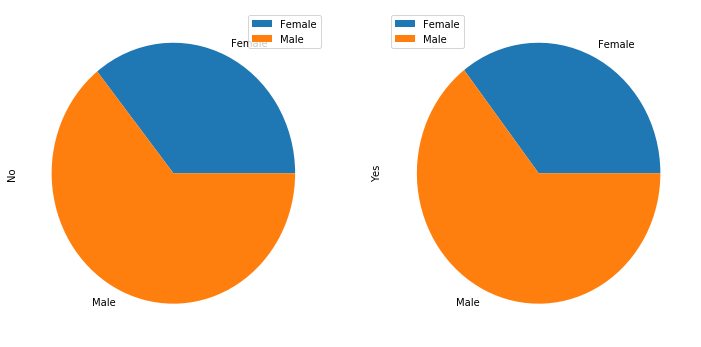

In [220]:
t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.pie(subplots=True, figsize = (12, 6))

### Qualitative - quantitative

In [221]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [222]:
tips.groupby("sex")["total_bill"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


In [223]:
billFemale = tips.total_bill[tips.sex == "Female"]
billMale = tips.total_bill[tips.sex == "Male"]
scipy.stats.ttest_ind(billFemale, billMale)

Ttest_indResult(statistic=-2.2777940289803134, pvalue=0.023611666846859398)

In [224]:
billGrouped = [tips.total_bill[tips.sex == s] for s in list(tips.sex.unique())]
scipy.stats.f_oneway(*billGrouped)

F_onewayResult(statistic=5.1883456384583608, pvalue=0.023611666846859697)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fdb3cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ff23048>], dtype=object)

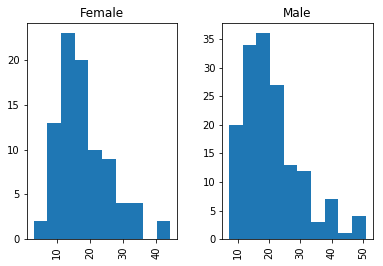

In [225]:
tips.hist(column = "total_bill", by = "sex")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ffe20b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1101d7208>]], dtype=object)

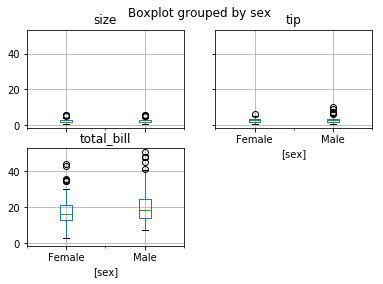

In [226]:
tips.boxplot(by = "sex")

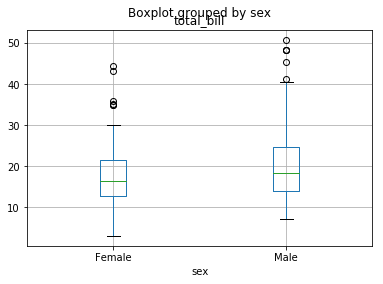

In [227]:
tips.boxplot(column = "total_bill", by = "sex") 

## Exercices

A partir du fichier [`diamonds.csv`](donnees/diamonds.csv) (voir l'aide [ici](http://docs.ggplot2.org/0.9.3.1/diamonds.html)), analyser les données suivant le déroulement classique 

1. Description de chaque variable
2. Recherche des liens entre le prix (`price`) et les autres variables
